In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

In [3]:
df = pd.read_csv('./data/tweets.csv')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [11]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text']) 

In [12]:
X_eval = cv.transform(df['text'])
y_eval = df['sentiment']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['sentiment'], test_size = 0.25, random_state = 5)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
#model = svm.SVC()
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
from sklearn import metrics

In [27]:
predicted = model.predict(X_eval)
accuracy = metrics.accuracy_score(predicted, y_eval)
precision_recall_score = metrics.average_precision_score(predicted, y_eval)

In [28]:
accuracy, precision_recall_score

(0.812401875, 0.7350899141835364)

In [29]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

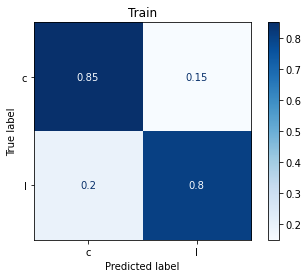

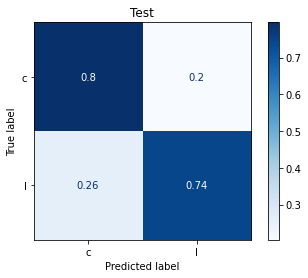

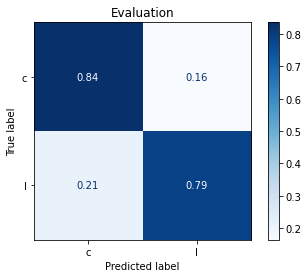

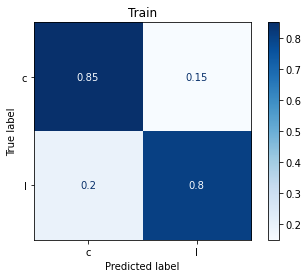

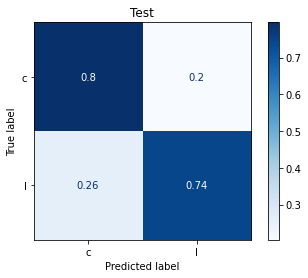

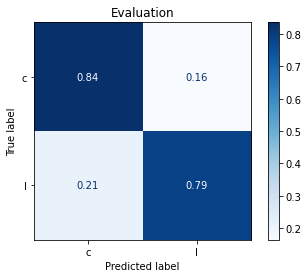

In [30]:
Xs = [X_train, X_test, X_eval]
Ys = [y_train, y_test, y_eval]
names = ['Train', 'Test', 'Evaluation']

save_img = False

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    for X, y, name in zip(Xs, Ys, names):
        disp = plot_confusion_matrix(model, X, y,
                                     display_labels="class_names",
                                     cmap=plt.cm.Blues,
                                     normalize='true',
                                    )
        disp.ax_.set_title(name)
        if save_img:
            plt.savefig('{}.png'.format(name))